---
title: "보험 데이터 분석"
author: "박성일"
date: "2024-08-23"
description: "자동차보험 데이터 분석"
image: "data/insurance.png"
format: 
  html:
    toc: true

---

## **보험**

**保險** (보호할 보, 위험 험), 위험에서 보호한다. <br>사고가 일어날 경우를 대비하여, 공통으로 그 사고의 위협을 받는 사람들이 미리 일정한 돈을 적립해 두었다가, <br>사고를 당한 사람에게 일정 금액을 주어 손해를 보상하는 제도.


# 1. 빈도와 심도

## 1.1 용어

- **보험료** : 보험 계약자가 보험회사에 납부하는 급액

- **보험금** : 보험사고 발생 시 보험 회사가 보험 수익자에게 지급하는 것

---

- **담보** : 보험의 목적이 되는 대상으로, 자동차보험의 경우 **자차**(본인 자동차), **자손**(본인 신체), **대물**(상대차량), **대인**(상대방 신체) 등으로 구분된다.

- **빈도** : 사고의 발생률, 보험을 가입한 전체 계약 중에서 사고가 발생한 계약의 비율 (사고 건수/ 계약 건수)

- **심도** : 사고 건당 손해액, 한 사고당 발생한 손해액의 평균 금액 (총 사고 금액/ 사고 건수)

- **순보험료** : 보험료 중에서 순수하게 손해 금액으로 이루어진 부분 (총 사고금액/ 계약건 = 빈도 * 심도)

---

- **LCM 계수** : 순보험료를 보험료로 전환하기 위해 사용되는 계수<br> = 1/예정위험율<br> = 1/(1 - 예정사업비율 - 예정이익율)

- **보험료** : 보험료 = 순보험료 * LCM 계수<br> = 위험율 (손해액, 사고금액) + 사업비율 (수수료, 인건비 등 경비) + 이익율 (보험회사의 이익분)


**LCM 계수를 정하기 위해 미래 사고에 대한 예측이 필요하다.**

## 1.2 예시

#### 순보험료는 빈도와 심도의 곱으로 산출된다.

만약 10,000명이 참가하는 행사에서 100명의 부상자가 나왔고, 총 치료비가 5,000,000원이 나왔다면..

- 빈도 = 0.01 = 100명/10,000명

- 심도 = 50,000 = 5,000,000원/100명

- 순보험료 = 500 = 50,000원 * 0.01

참가자 10,000명에게서 500원씩 보험료를 받으면 총 치료비 5,000,000원을 부담할 수 있다.

## 1.3 빈도와 심도의 계산

사용 데이터는 보험 계약 데이터이다.

총 계약수 : 2794건

|컬럼명_영문|컬럼명_한글|설명|
|---|---|:---:|
|car_knd|차종|소형(1A,1E), 준중형(1F,1G,1H),중형(1L,1M,1N), <br>대형(1P,29), SUB/VAN(86,8B,8A)|
|GAI_COD|가입코드(가입년수)|1~8|
|PIB_AGE|피보험자 나이|22~91|
|PIB_SEX|피보험자 성별|남자:2259 / 여자:535|
|in1_los|대인 손해액|-|
|mul_los|대물 손해액|-|
|jas_los|자손 손해액|-|
|cha_los|자차 손해액|-|

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', family='NanumGothicCoding')
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:

df = pd.read_csv("data/프로젝트자료.csv")
df.head()

### 1.3.1 대인 빈도/심도 계산

#### 대인 빈도

In [2]:
# 대인 사고건수
in1_cnt = len(df[df['in1_los']!=0]['in1_los'])
print(f"대인사고건수\t: {in1_cnt}")

# 대인 사고건수 / 총 계약수 = 대인 빈도
in1_bin = in1_cnt/len(df)
print(f"대인 빈도\t\t: {round(in1_bin, 6)}")

대인사고건수	: 61
대인 빈도		: 0.021832


#### 대인 심도

In [3]:
# 총 대인 손해액
in1_sum = df['in1_los'].sum()
print(f"총 대인 손해액\t: {in1_sum}")

# 총 대인 손해액/대인 사고건수 = 대인 심도
in1_sim = in1_sum/in1_cnt
print(f"대인 심도\t\t: {round(in1_sim,6)}")

총 대인 손해액	: 279110140
대인 심도		: 4575576.065574


### 1.3.2 대물 빈도/심도 계산

#### 대물 빈도

In [4]:
# 대물 사고건수
mul_cnt = len(df[df['mul_los']!=0]['mul_los'])
print(f"대물사고건수\t: {mul_cnt}")

# 대물 사고건수 / 총 계약수 = 대물 빈도
mul_bin = mul_cnt/len(df)
print(f"대물 빈도\t\t: {round(mul_bin, 6)}")

대물사고건수	: 175
대물 빈도		: 0.062634


#### 대물 심도

In [5]:
# 총 대물 손해액
mul_sum = df['mul_los'].sum()
print(f"총 대물 손해액\t: {mul_sum}")

# 총 대물 손해액/대물 사고건수 = 대물 심도
mul_sim = mul_sum/mul_cnt
print(f"대물 심도\t\t: {round(mul_sim,6)}")

총 대물 손해액	: 224590640
대물 심도		: 1283375.085714


### 1.3.3 자손 빈도/심도 계산

#### 자손 빈도

In [6]:
# 자손 사고건수
jas_cnt = len(df[df['jas_los']!=0]['jas_los'])
print(f"자손사고건수\t: {jas_cnt}")

# 자손 사고건수 / 총 계약수 = 자손 빈도
jas_bin = jas_cnt/len(df)
print(f"자손 빈도\t\t: {round(jas_bin, 6)}")

자손사고건수	: 15
자손 빈도		: 0.005369


#### 자손 심도

In [7]:
# 총 자손 손해액
jas_sum = df['jas_los'].sum()
print(f"총 자손 손해액\t: {jas_sum}")

# 총 자손 손해액/자손 사고건수 = 자손 심도
jas_sim = jas_sum/jas_cnt
print(f"자손 심도\t\t: {round(jas_sim,6)}")

총 자손 손해액	: 15501900
자손 심도		: 1033460.0


### 1.3.4 자차 빈도/심도 계산

#### 자차 빈도

In [8]:
# 자차 사고건수
cha_cnt = len(df[df['cha_los']!=0]['cha_los'])
print(f"자차사고건수\t: {cha_cnt}")

# 자차 사고건수 / 총 계약수 = 자차 빈도
cha_bin = cha_cnt/len(df)
print(f"자차 빈도\t\t: {round(cha_bin, 6)}")

자차사고건수	: 794
자차 빈도		: 0.28418


#### 자차 심도

In [9]:
# 총 자차 손해액
cha_sum = df['cha_los'].sum()
print(f"총 자차 손해액\t: {cha_sum}")

# 총 자차 손해액/자차 사고건수 = 자차 심도
cha_sim = cha_sum/cha_cnt
print(f"자차 심도\t\t: {round(cha_sim,6)}")

총 자차 손해액	: 722254450
자차 심도		: 909640.365239


#### 1.3.5 빈도/ 심도 종합

빈도와 심도를 통해 각 담보별 순 보험료를 구해보았다.

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sunbo = pd.DataFrame([{"빈도":in1_bin,"심도":in1_sim},\
                        {"빈도":mul_bin,"심도":mul_sim},\
                            {"빈도":jas_bin,"심도":jas_sim},\
                                {"빈도":cha_bin,"심도":cha_sim},],\
                       index=["대인","대물","자손","자차"])

sunbo["순보험료"] = [i*j for i,j in sunbo.values]
sunbo

,빈도,심도,순보험료
대인,0.02183,4575576.06557,99896.25626
대물,0.06263,1283375.08571,80383.19256
자손,0.00537,1033460.00000,5548.28203
자차,0.28418,909640.36524,258501.95061


In [11]:
df

,car_knd,GAI_COD,PIB_AGE,PIB_SEX,in1_los,mul_los,jas_los,cha_los
0,1A,8,43,1,1997490,427160,0,144490
1,1A,8,38,1,0,0,0,371430
2,1A,8,51,1,0,0,0,1183420
3,1A,8,34,1,0,0,0,1320000
4,1A,8,37,1,0,0,0,490090
...,...,...,...,...,...,...,...,...
2789,8B,8,46,1,0,0,0,0
2790,8B,8,47,1,0,0,0,0
2791,8B,8,60,2,0,0,0,0
2792,8B,8,33,1,0,0,0,0


## 1.4 그룹별 빈도와 심도

그룹별로 빈도와 심도의 차이가 있을 수 있다.

### 1.4.1 차종

In [34]:

car_knd_dict = {'1A': "소형",
 '1E': "소형",
 '1F': "준중형",
 '1G': "준중형",
 '1H': "준중형",
 '1L': "중형",
 '1M': "중형",
 '1N': "중형",
 '1P': "대형",
 '29': "대형",
 '86': "SUB/VAN",
 '8A': "SUB/VAN",
 '8B': "SUB/VAN"}

df['차종'] = [car_knd_dict.get(i) for i in df['car_knd']]

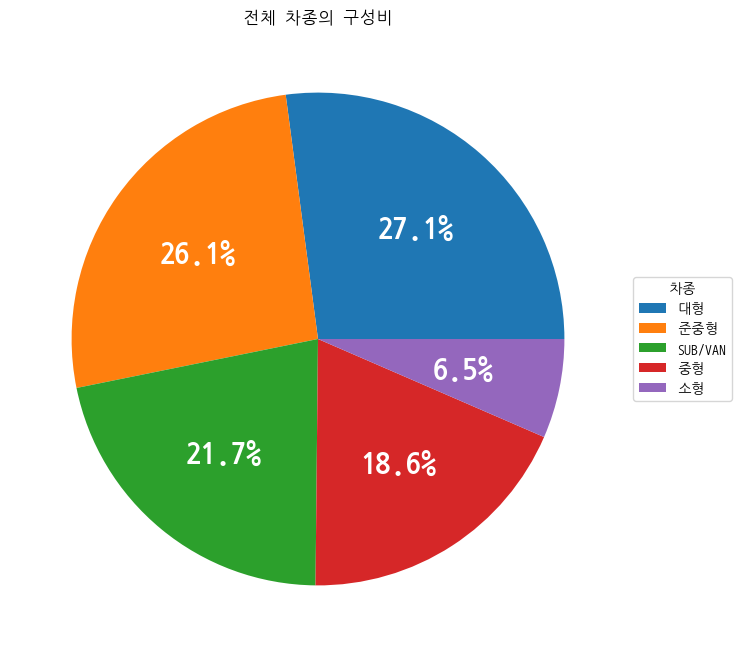

In [46]:
import matplotlib.pyplot as plt
data = df['차종'].value_counts()
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(data.values, labels=data.index, autopct='%1.1f%%', 
                                  textprops=dict(color="w"))

ax.set_title("전체 차종의 구성비")
ax.legend(wedges, data.index,
          title="차종",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=22, weight="bold")
plt.show()

In [48]:
df

,car_knd,GAI_COD,PIB_AGE,PIB_SEX,in1_los,mul_los,jas_los,cha_los,차종
0,1A,8,43,1,1997490,427160,0,144490,소형
1,1A,8,38,1,0,0,0,371430,소형
2,1A,8,51,1,0,0,0,1183420,소형
3,1A,8,34,1,0,0,0,1320000,소형
4,1A,8,37,1,0,0,0,490090,소형
...,...,...,...,...,...,...,...,...,...
2789,8B,8,46,1,0,0,0,0,SUB/VAN
2790,8B,8,47,1,0,0,0,0,SUB/VAN
2791,8B,8,60,2,0,0,0,0,SUB/VAN
2792,8B,8,33,1,0,0,0,0,SUB/VAN
